# Stock Prices Analysis and Prediction (yfinance library)

In this project, we'll explore time series data, which consists of data points indexed by time. This type of data is crucial for data analysts and data scientists. We'll focus on stock market data, specifically technology stocks like Apple, Meta, Google, Microsoft, Nvidia, and AMD. Using the yfinance library, we'll retrieve stock information and visualize it using Seaborn and Matplotlib.

We'll address several key questions:

1. What is the moving average of these stocks?
2. What is the average daily return of the stock?
3. What is the risk associated with investing in a particular stock?
4. Can we predict future stock behavior, such as the closing price of Apple stock, using LSTM?

In [1]:
!pip install pandas_datareader



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('whitegrid')
plt.style.use('ggplot')

#For read stock data from yahoo finance
import yfinance as yf
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

yf.pdr_override()

#For timestamp
from datetime import datetime

#The tech companies stock that will be used for this analysis are the top 6 stocks at the moment 04/06/2024

comtech_list= ['MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMD', 'META']

#For the range of date we need to set START and END times

comtech_list= ['MSFT', 'AAPL', 'NVDA', 'AMD', 'GOOG', 'META']
end = datetime.now()
start = datetime(end.year -2, end.month, end.day)

for stocks in comtech_list:
    globals()[stocks] = yf.download(stocks, start, end)
company_list = [MSFT, AAPL, NVDA, AMD, GOOG, META]
company_name = ['MICROSOFT', 'APPLE', 'NVDIA', 'AMD INC', 'GOOGLE', 'META INC']

for company, com_name in zip(company_list, company_name):
    company['company_name']=com_name
    
stc_df=pd.concat(company_list, axis=0)
stc_df.tail(10)
    




yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-21  467.119995  470.700012  462.269989  464.630005  464.630005   
2024-05-22  467.869995  473.720001  465.649994  467.779999  467.779999   
2024-05-23  472.880005  474.359985  461.540009  465.779999  465.779999   
2024-05-24  467.619995  479.850006  466.299988  478.220001  478.220001   
2024-05-28  476.579987  480.859985  474.839996  479.920013  479.920013   
2024-05-29  474.660004  479.850006  473.700012  474.359985  474.359985   
2024-05-30  471.670013  471.730011  464.709991  467.049988  467.049988   
2024-05-31  465.799988  469.119995  454.459991  466.829987  466.829987   
2024-06-03  470.859985  479.600006  468.239990  477.489990  477.489990   
2024-06-04  477.000000  478.890015  473.230011  476.989990  476.989990   

              Volume company_name  
Date                               
2024-05-21  11742200     META INC  
2024-05-22  10078600     META INC  
2024-05-23  11747900     META INC  
2024-05-24  12012300     META INC  
2024-05-28  10175800     META INC  
2024-05-29   9226200     META INC  
2024-05-30  10735200     META INC  
2024-05-31  16919800     META INC  
2024-06-03  11279400     META INC  
2024-06-04   6958700     META INC

Looking at our data, we see that it consists of numeric values with dates as the index. It's important to note that weekends are not included in the records. Using globals() to set DataFrame names is not recommended for neat code, but it's a straightforward approach. Now that we have our data, let's conduct some basic data analysis and examine our data.

# Descriptive Statistics about the Data

.describe() produces summary statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding any NaN values. It works for both numeric and object series, as well as mixed data types in DataFrame columns. The specific output varies depending on the data provided. Refer to the notes below for more details.

In [3]:
#describe statistics
NVDA.describe()

Open         High          Low        Close    Adj Close  \
count   502.000000   502.000000   502.000000   502.000000   502.000000   
mean    398.496932   405.687629   391.255139   399.079721   398.998756   
std     255.038756   259.243701   249.877128   255.005182   255.045616   
min     109.709999   117.349998   108.129997   112.269997   112.186241   
25%     170.642498   176.115002   168.420002   171.912498   171.733223   
50%     389.759995   396.379990   384.535004   390.584991   390.459763   
75%     484.567497   491.107506   478.312508   484.692497   484.607819   
max    1157.160034  1166.000000  1140.449951  1164.369995  1164.369995   

             Volume  
count  5.020000e+02  
mean   4.949298e+07  
std    1.520965e+07  
min    1.679340e+07  
25%    3.955955e+07  
50%    4.691750e+07  
75%    5.598100e+07  
max    1.543911e+08

We have 502 records within 2 years of data stocks, as we know stock market are close in weekend

##Data Information

.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [4]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-06-06 to 2024-06-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Adj Close     502 non-null    float64
 5   Volume        502 non-null    int64  
 6   company_name  502 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


##Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

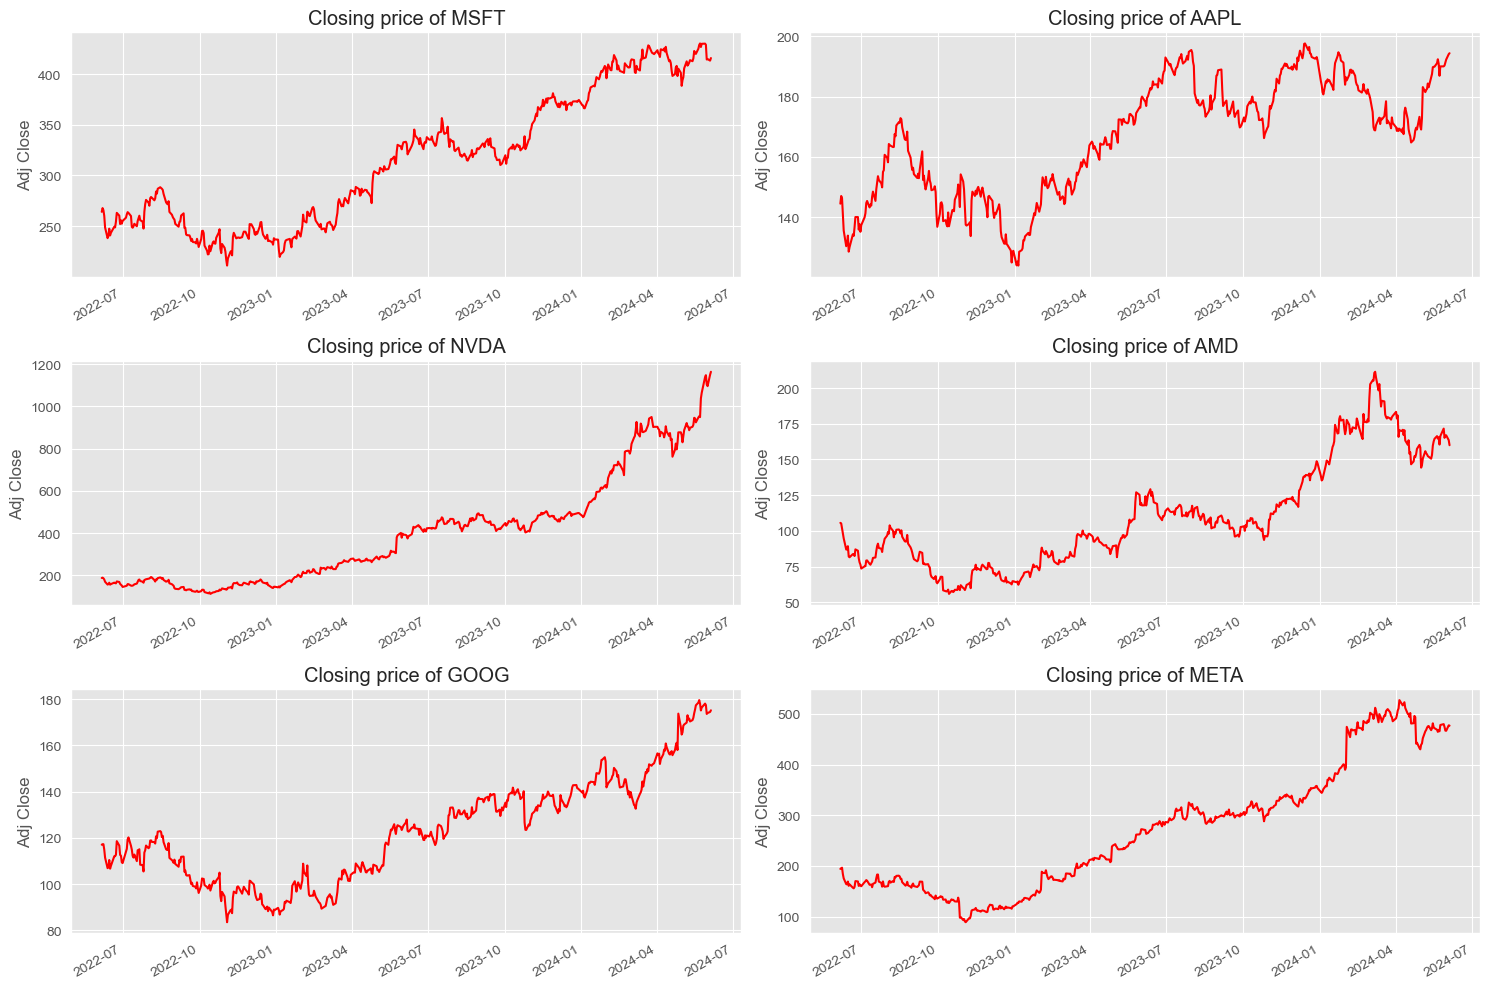

In [5]:
#
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=0.8)
for x, company in enumerate(company_list, 1): 
    plt.subplot(3, 2, x)
    company['Adj Close'].plot(color='red')
    plt.title(f"Closing price of {comtech_list[x-1]}")
    plt.xlabel(None)
    plt.ylabel('Adj Close')
plt.tight_layout()

## Volume Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

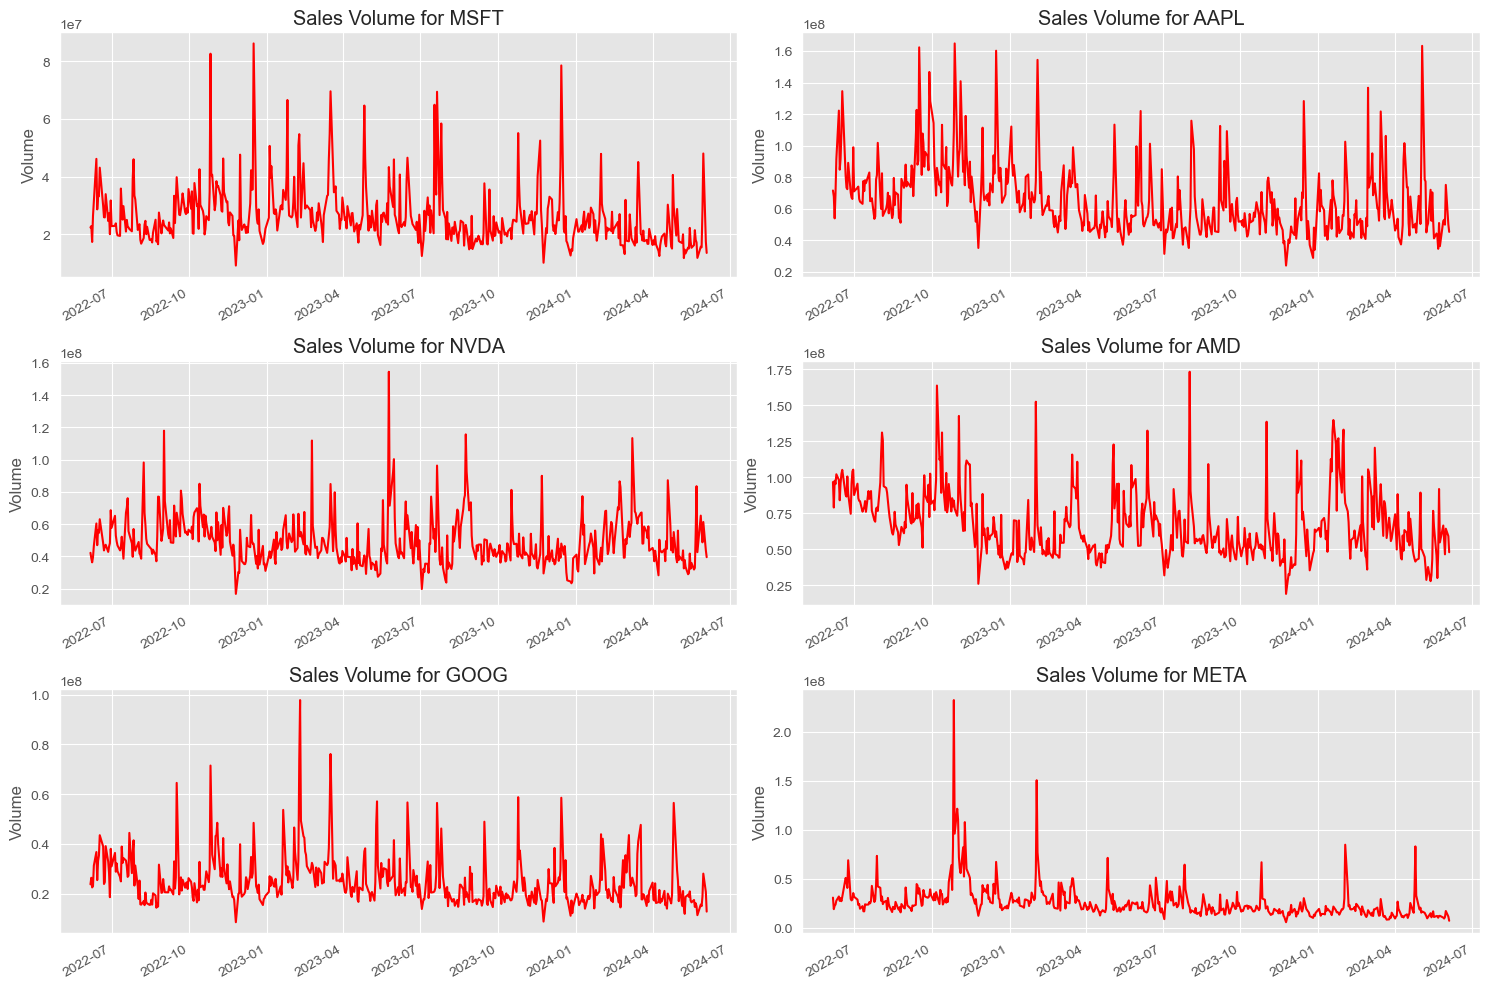

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=0.8)

for x, company in enumerate(company_list, 1):
    plt.subplot(3, 2, x)
    company['Volume'].plot(color='red')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {comtech_list[x - 1]}")
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

## 1. Moving Average of various stock

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses. In this case we will go through short-term MA which is 5-10-20 days.

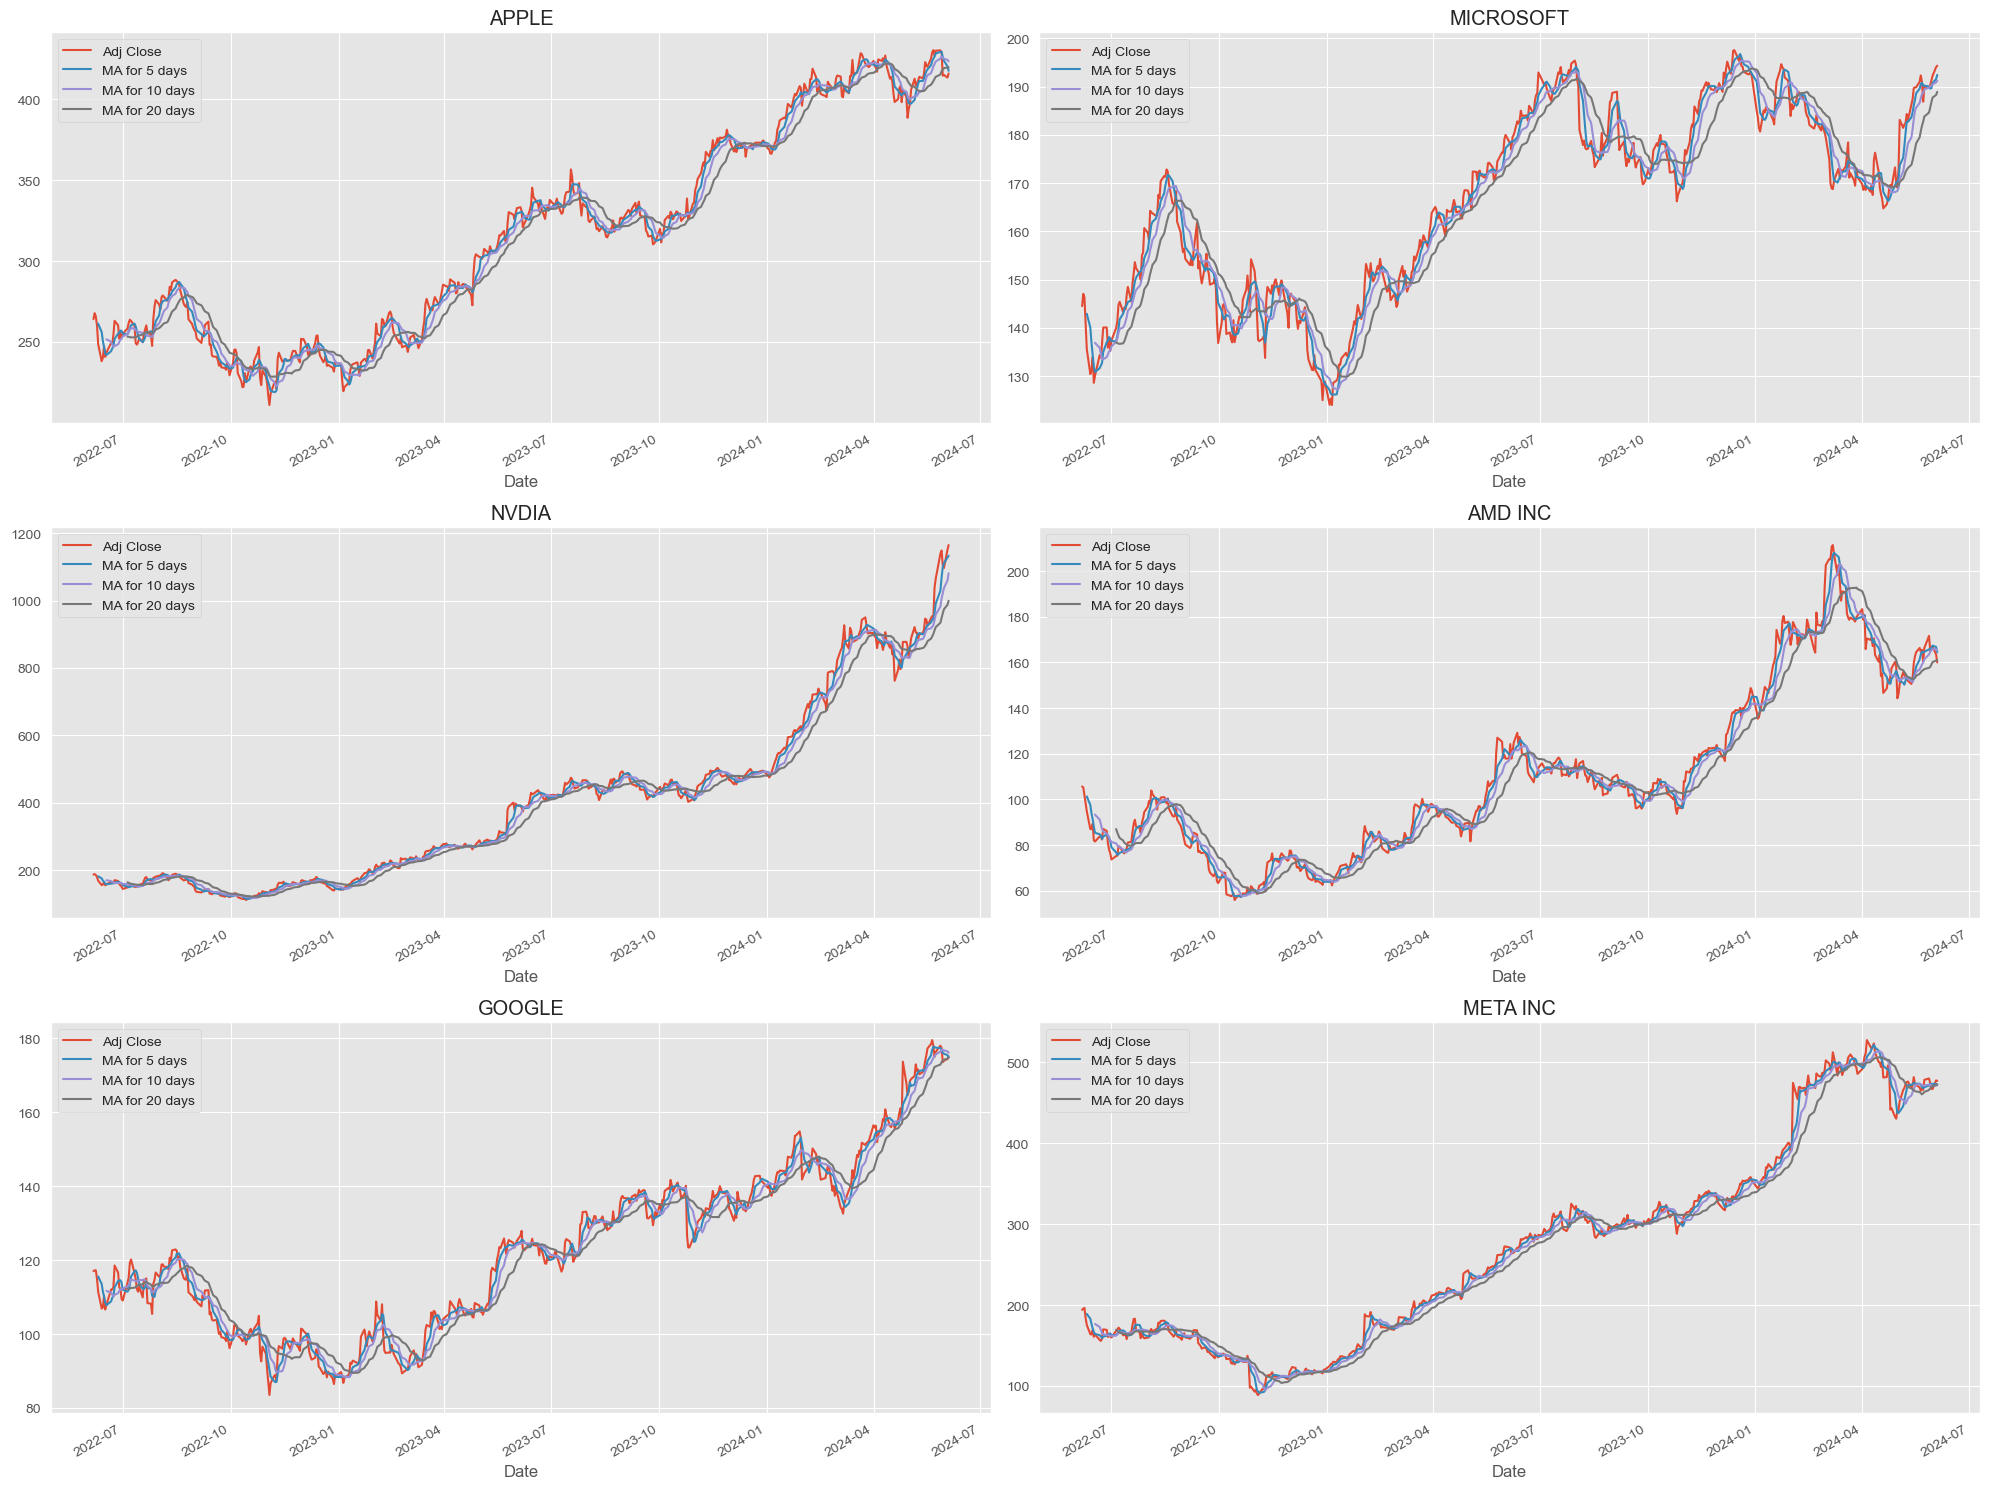

In [7]:
# moving averages plotted
ma_day = [5, 10, 20]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting the data
company_names = ['APPLE', 'MICROSOFT', 'NVDIA', 'AMD INC', 'GOOGLE', 'META INC']
for x, (company, name) in enumerate(zip(company_list, company_names)):
    row = x // 2
    col = x % 2
    company[['Adj Close', 'MA for 5 days', 'MA for 10 days', 'MA for 20 days']].plot(ax=axes[row, col])
    axes[row, col].set_title(name)

fig.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## 2. Daily return of the stock on average

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

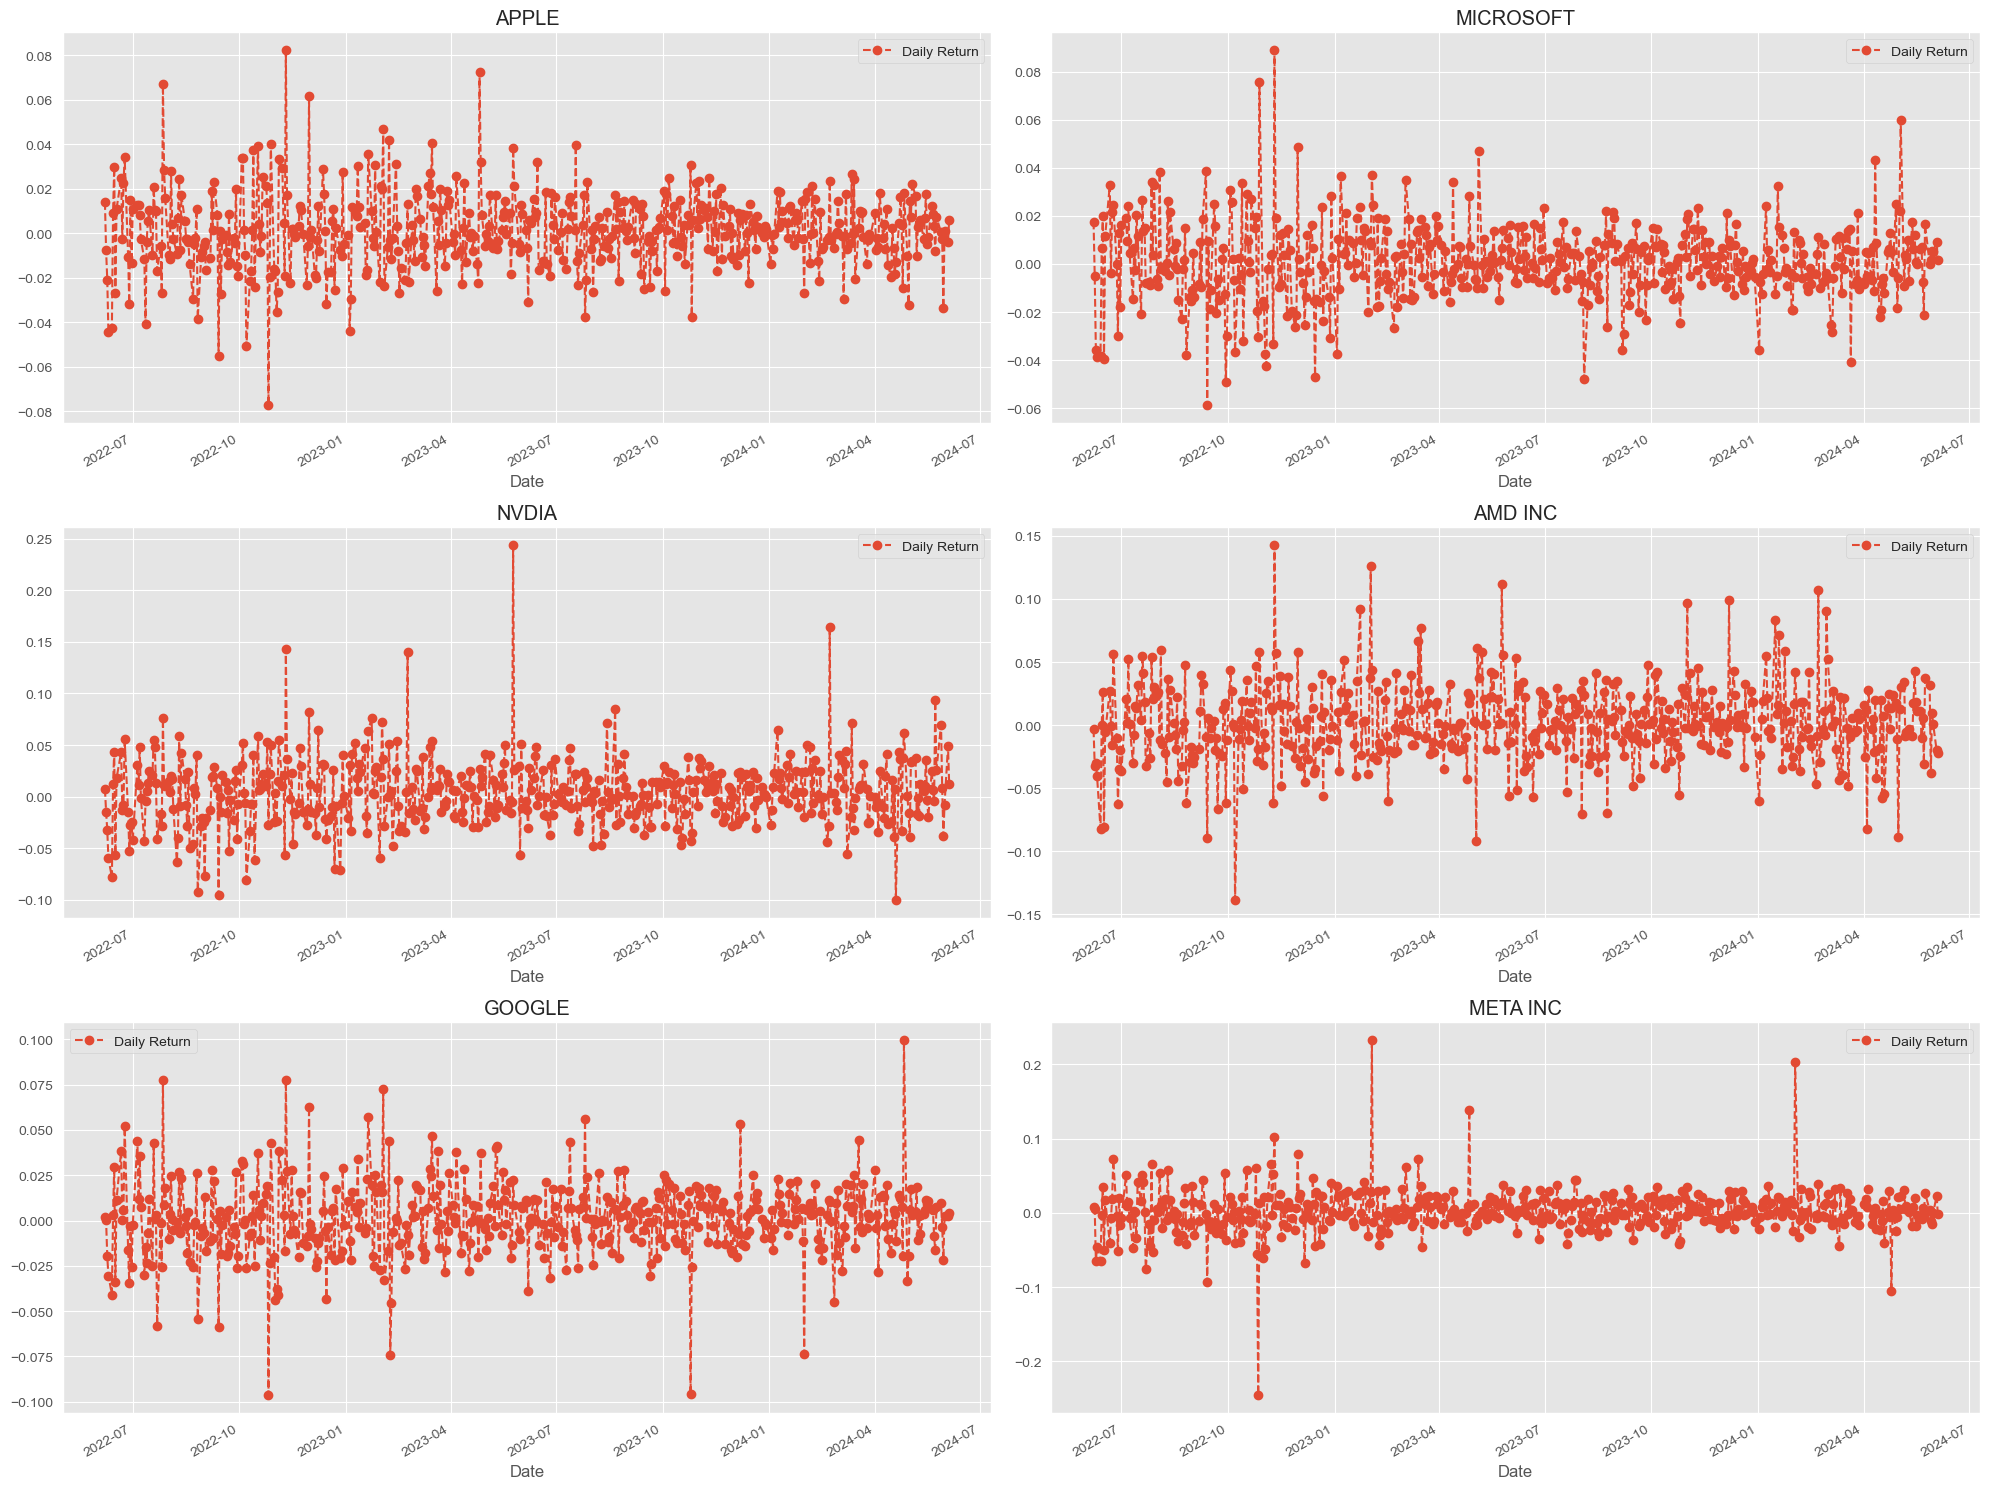

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting the daily return for each company
company_names = ['APPLE', 'MICROSOFT', 'NVDIA', 'AMD INC', 'GOOGLE', 'META INC']
for i, (company, name) in enumerate(zip(company_list, company_names)):
    row = i // 2
    col = i % 2
    company['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(name)

fig.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.



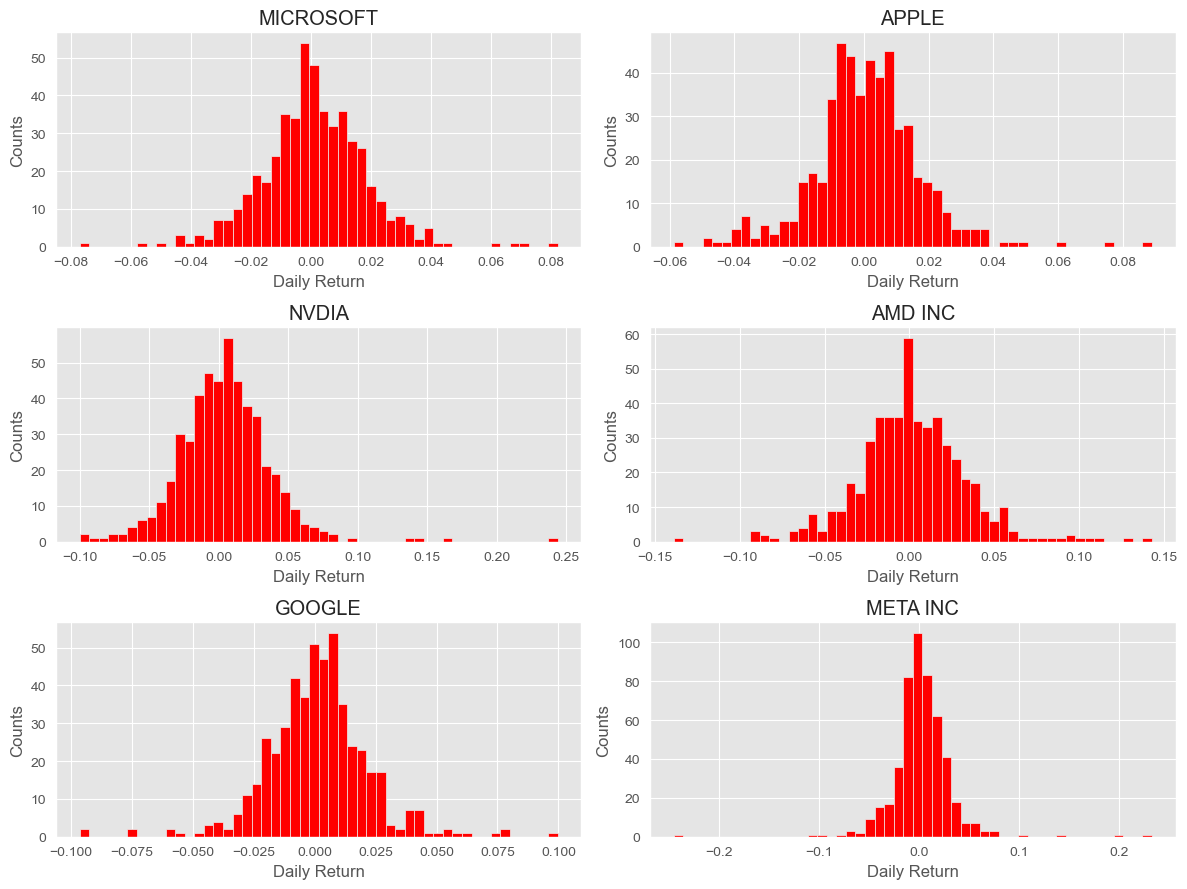

In [9]:
plt.figure(figsize=(12, 9))
for x, company in enumerate(company_list, 1):
    plt.subplot(3, 2, x)
    company['Daily Return'].hist(bins=50,color='red')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[x - 1]}')
plt.tight_layout()

## 3. What is the amount of risk associated with investing in a specific stock??
     

There are several methods to quantify risk. One basic approach, using the data on daily percentage returns that we have collected, involves comparing the expected return to the standard deviation of the daily returns.

In [10]:
#make new df regarding closing stock
stockclose_df=pdr.get_data_yahoo(comtech_list, start=start, end=end)['Adj Close']

#make new tech return df
comtech_rets = stockclose_df.pct_change()

[*********************100%%**********************]  6 of 6 completed


In [11]:
comtech_rets.head()

Ticker          AAPL       AMD      GOOG      META      MSFT      NVDA
Date                                                                  
2022-06-06       NaN       NaN       NaN       NaN       NaN       NaN
2022-06-07  0.017586 -0.003502  0.001872  0.007207  0.013953  0.007452
2022-06-08 -0.005043 -0.032105  0.000073  0.005060 -0.007670 -0.014480
2022-06-09 -0.035955 -0.030422 -0.019789 -0.064280 -0.020783 -0.032175
2022-06-10 -0.038629 -0.040283 -0.030374 -0.045815 -0.044564 -0.059508

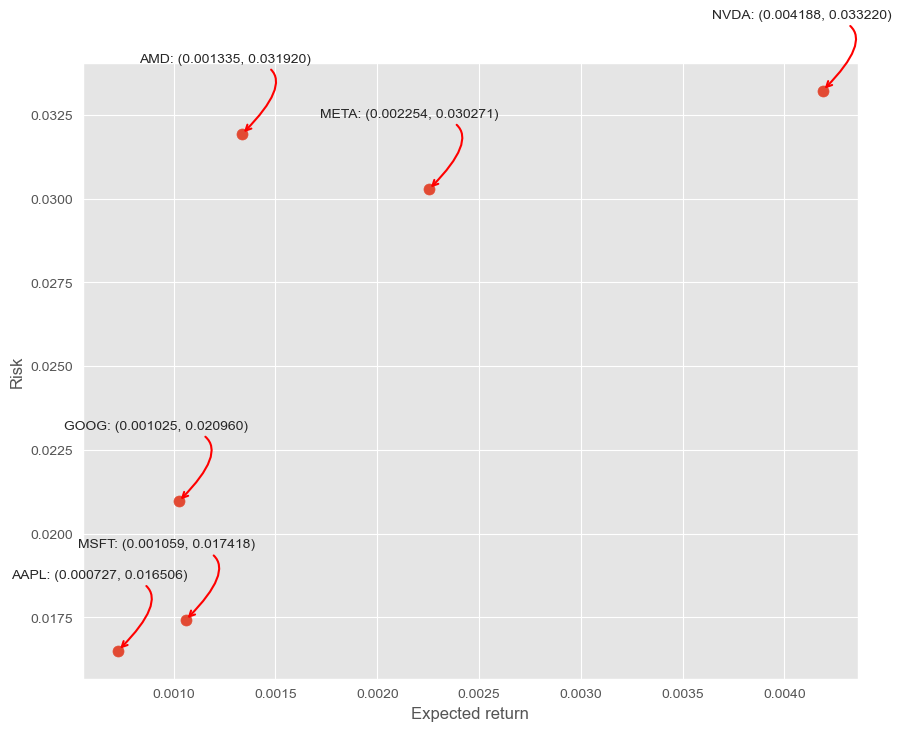

In [12]:
rets = comtech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(f'{label}: ({x:.6f}, {y:.6f})', 
                 xy=(x, y), 
                 xytext=(50, 50), 
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='red', lw=1.5, connectionstyle='angle3,angleA=0,angleB=45'))

## 4. Predicting the Closing Stock Price of NVIDIA (NVDA) Using LSTM


In this section, we will use a Long Short-Term Memory (LSTM) model to predict the closing stock price of NVIDIA (NVDA). LSTMs are a type of recurrent neural network (RNN) well-suited for sequence prediction tasks like stock price forecasting. We will leverage historical stock price data to train the model and then use it to make predictions.

In [13]:
#get Nvidia data stock from yahoo

nvda_df=pdr.get_data_yahoo('NVDA', start= '2013-01-01', end= datetime.now())

nvda_df

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02     3.140000     3.182500     3.127500     3.180000     2.935840   
2013-01-03     3.180000     3.217500     3.145000     3.182500     2.938148   
2013-01-04     3.187500     3.297500     3.177500     3.287500     3.035086   
2013-01-07     3.285000     3.295000     3.170000     3.192500     2.947381   
2013-01-08     3.200000     3.210000     3.100000     3.122500     2.882755   
...                 ...          ...          ...          ...          ...   
2024-05-29  1130.500000  1154.920044  1109.010010  1148.250000  1148.250000   
2024-05-30  1146.500000  1158.189941  1096.630005  1105.000000  1105.000000   
2024-05-31  1125.199951  1127.170044  1069.400024  1096.329956  1096.329956   
2024-06-03  1136.209961  1150.000000  1120.030029  1150.000000  1150.000000   
2024-06-04  1157.160034  1166.000000  1140.449951  1164.369995  1164.369995   

              Volume  
Date                  
2013-01-02  47883600  
2013-01-03  29888800  
2013-01-04  52496800  
2013-01-07  61073200  
2013-01-08  46642400  
...              ...  
2024-05-29  55744200  
2024-05-30  48735000  
2024-05-31  61326300  
2024-06-03  43839200  
2024-06-04  39537900  

[2875 rows x 6 columns]

In [14]:

!pip install --upgrade plotly


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import plotly.express as px

In [16]:
#Historical close price data
fig = px.line(nvda_df, x=nvda_df.index, y='Close', title='NVDA Close Price History')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price USD ($)')

In [17]:
# Create a new dataframe with only the 'Close' column 
nvdaclose_df = nvda_df.filter(['Close'])
# Convert the dataframe to a numpy array
nvdaclose_dataset = nvdaclose_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(nvdaclose_dataset) * .95 ))
training_data_len

nvdaclose_dataset

array([[   3.18000007],
       [   3.18249989],
       [   3.2874999 ],
       ...,
       [1096.32995605],
       [1150.        ],
       [1164.36999512]])

In [18]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(nvdaclose_dataset)
    scaled_data

array([[1.59294097e-04],
       [1.61446562e-04],
       [2.51856653e-04],
       ...,
       [9.41414238e-01],
       [9.87626740e-01],
       [1.00000000e+00]])

In [19]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print() 
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


[array([1.59294097e-04, 1.61446562e-04, 2.51856653e-04, 1.70057242e-04,
       1.09783711e-04, 4.95103857e-05, 5.38155206e-05, 4.95103857e-05,
       4.73577156e-05, 0.00000000e+00, 2.36789605e-05, 5.81208608e-05,
       4.08999106e-05, 2.79840954e-05, 3.22894355e-05, 4.52050455e-05,
       9.25627612e-05, 1.35615137e-04, 7.74944811e-05, 7.31891409e-05,
       6.02735309e-05, 8.39522861e-05, 3.87472405e-05, 9.90205661e-05,
       7.74944811e-05, 6.67313359e-05, 8.39522861e-05, 1.14089052e-04,
       9.68681013e-05, 8.39522861e-05, 1.61446562e-04, 1.61446562e-04,
       1.24852197e-04, 8.61049562e-05, 6.67313359e-05, 1.16241722e-04,
       6.88840060e-05, 8.39522861e-05, 1.33462672e-04, 1.46378282e-04,
       1.57141427e-04, 1.46378282e-04, 1.76515047e-04, 1.74362377e-04,
       1.67904572e-04, 1.80820182e-04, 1.54988757e-04, 1.63599232e-04,
       1.63599232e-04, 1.65751902e-04, 1.42073147e-04, 1.22699527e-04,
       1.05478576e-04, 1.37767807e-04, 9.47154312e-05, 1.07631041e-04,
     

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.16.1
Keras version: 3.3.3


In [21]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (2672, 60, 1)
y_train shape: (2672,)


In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=2)

C:\Users\Administrator\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/2
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 4.5388e-04
Epoch 2/2
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - loss: 9.4534e-05


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = nvdaclose_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


28.963446038772773

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13360\1420126047.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



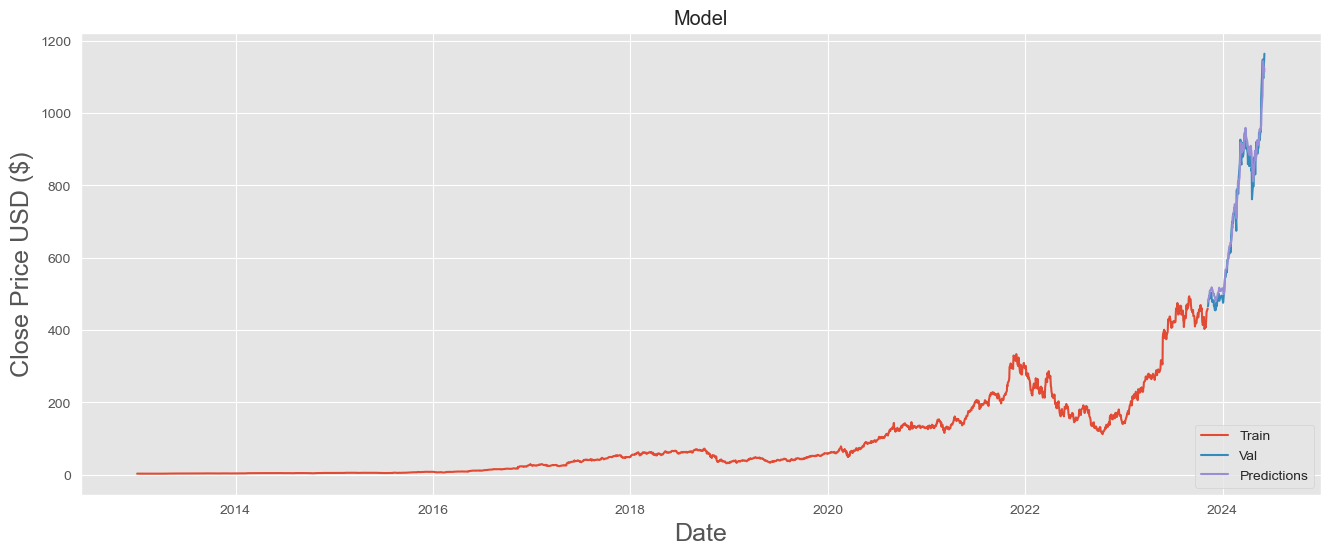

In [24]:
# Plot the data
train = nvdaclose_df[:training_data_len]
valid = nvdaclose_df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
# Create a DataFrame for train, valid, and predictions
train_df = train.reset_index()
valid_df = valid.reset_index()

# Create a DataFrame for predictions with date index
predictions_df = valid[['Predictions']].reset_index()

# Plot the data
fig = px.line()
fig.add_scatter(x=train_df['Date'], y=train_df['Close'], name='Train', mode='lines', line=dict(color='blue'))
fig.add_scatter(x=valid_df['Date'], y=valid_df['Close'], name='Valid', mode='lines', line=dict(color='green'))
fig.add_scatter(x=valid_df['Date'], y=predictions_df['Predictions'], name='Predictions', mode='lines', line=dict(color='red'))

fig.update_layout(title='Model', xaxis_title='Date', yaxis_title='Close Price USD ($)', legend_title='Legend', legend=dict(x=0, y=1))
fig.show()


In [26]:
valid

Close  Predictions
Date                                
2023-11-08   465.739990   478.634979
2023-11-09   469.500000   483.271210
2023-11-10   483.350006   486.644745
2023-11-13   486.200012   494.136353
2023-11-14   496.559998   500.469055
...                 ...          ...
2024-05-29  1148.250000  1107.491699
2024-05-30  1105.000000  1143.740967
2024-05-31  1096.329956  1134.780151
2024-06-03  1150.000000  1113.748657
2024-06-04  1164.369995  1123.955078

[143 rows x 2 columns]

In [27]:
#make new df regarding closing stock
nvdastockclose_df=pdr.get_data_yahoo('NVDA', start=start, end=end)['Adj Close']

#make new tech return df
nvdacomtech_rets = nvdastockclose_df.pct_change()

[*********************100%%**********************]  1 of 1 completed


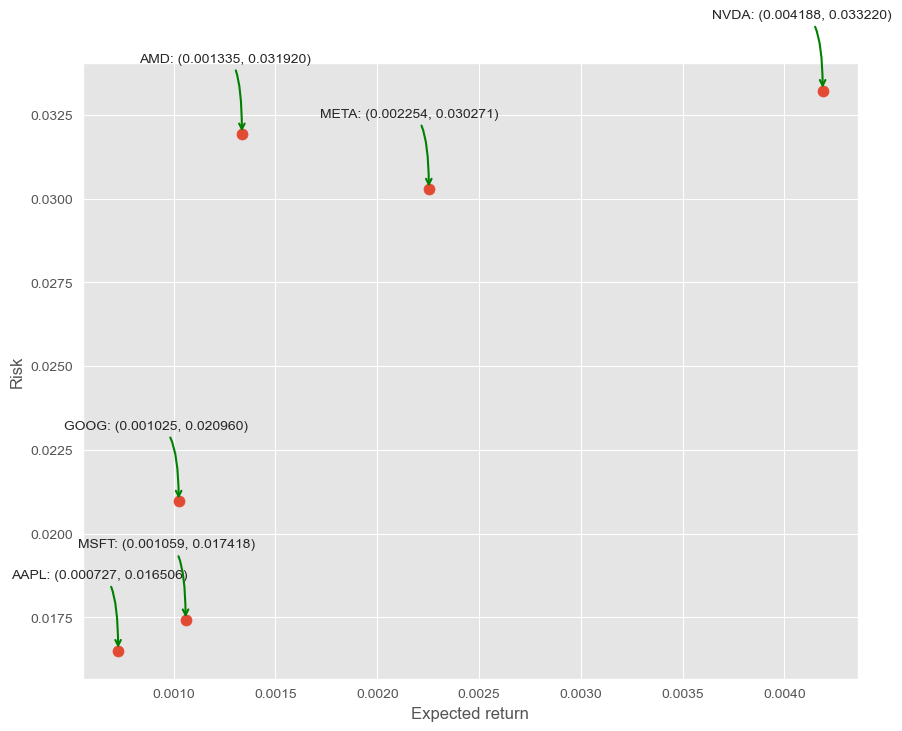

In [28]:
rets = comtech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(f'{label}: ({x:.6f}, {y:.6f})', 
                 xy=(x, y), 
                 xytext=(50, 50), 
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='green', lw=1.5, connectionstyle='angle3,angleA=0,angleB=-90'))

In [29]:
# Calculate the average actual closing price
average_actual_price = y_test.mean()

# Calculate the percentage difference
percentage_difference = (rmse / average_actual_price) * 100

print("Percentage Difference:", percentage_difference)


Percentage Difference: 3.9855016704976216
